In [1]:
import pandas as pd
import scipy.misc
import random
import numpy as np
import cv2
import time
import pickle 

#read data.txt
driving_log=pd.read_csv('../data/driving_log.csv').sample(frac=1.0)

driving_log.describe()

,steering,throttle,brake,speed
count,8036.000000,8036.000000,8036.000000,8036.000000
mean,0.004070,0.869660,0.001970,28.169839
std,0.128840,0.301326,0.036565,6.149327
min,-0.942695,0.000000,0.000000,0.502490
25%,0.000000,0.985533,0.000000,30.183093
50%,0.000000,0.985533,0.000000,30.186400
75%,0.000000,0.985533,0.000000,30.186640
max,1.000000,0.985533,1.000000,30.709360


In [2]:
df_no_zero = driving_log[driving_log.steering != 0]
df_zero = driving_log[driving_log.steering == 0]

print("Non-zero steering data: %d"%(len(df_no_zero)))
print("Zero steering angle data: %d"%(len(df_zero)))
df = df_no_zero.append(df_zero.sample(frac=0.085))
print("Total data set: %d"%(len(df)))

df[['center','left','right','steering']].to_csv('../data/trimmed_driving_log.csv',index=False)

Non-zero steering data: 3675
Zero steering angle data: 4361
Total data set: 4046


In [3]:
gallery = {}
def savetoGallery(string):
    assert(string is not None)
    string = string.strip()
    img = cv2.imread('../data/' + string)
    gallery[string] = img

images = driving_log[['center','left','right']].as_matrix()
for row in images:
    savetoGallery(row[0])
    savetoGallery(row[1])
    savetoGallery(row[2])

KeyboardInterrupt: 

In [4]:
print('total number: {}'.format(len(gallery)))
f = open('../gallery.p', 'wb')   
pickle.dump(gallery, f)      
f.close() 

total number: 11947


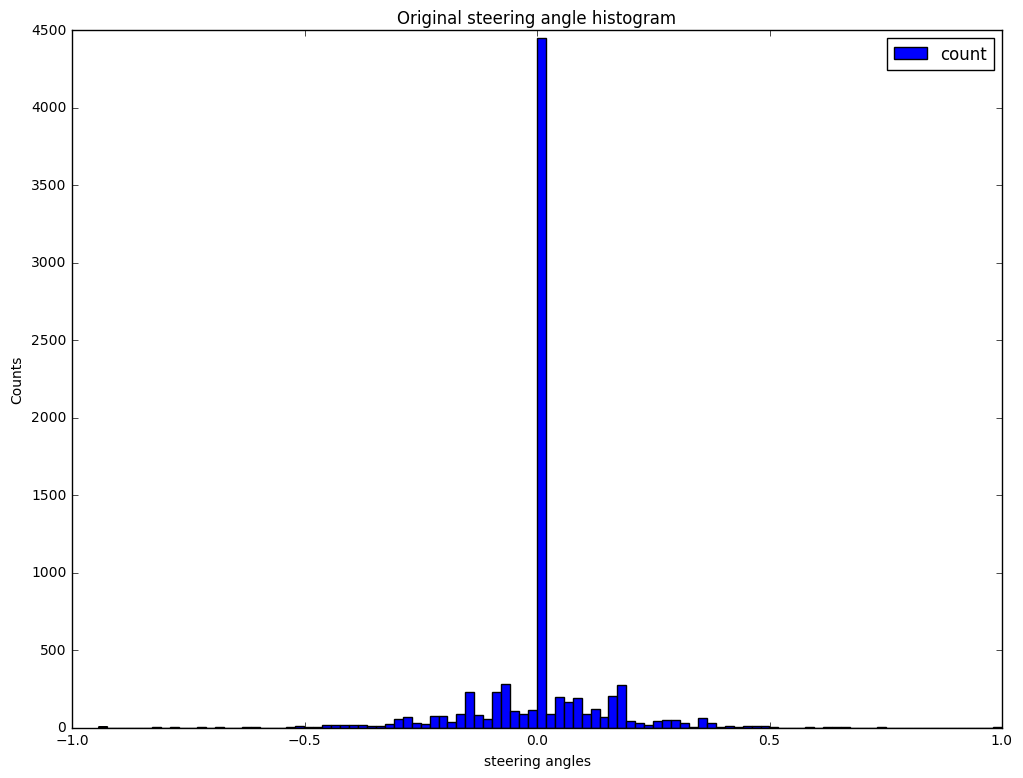

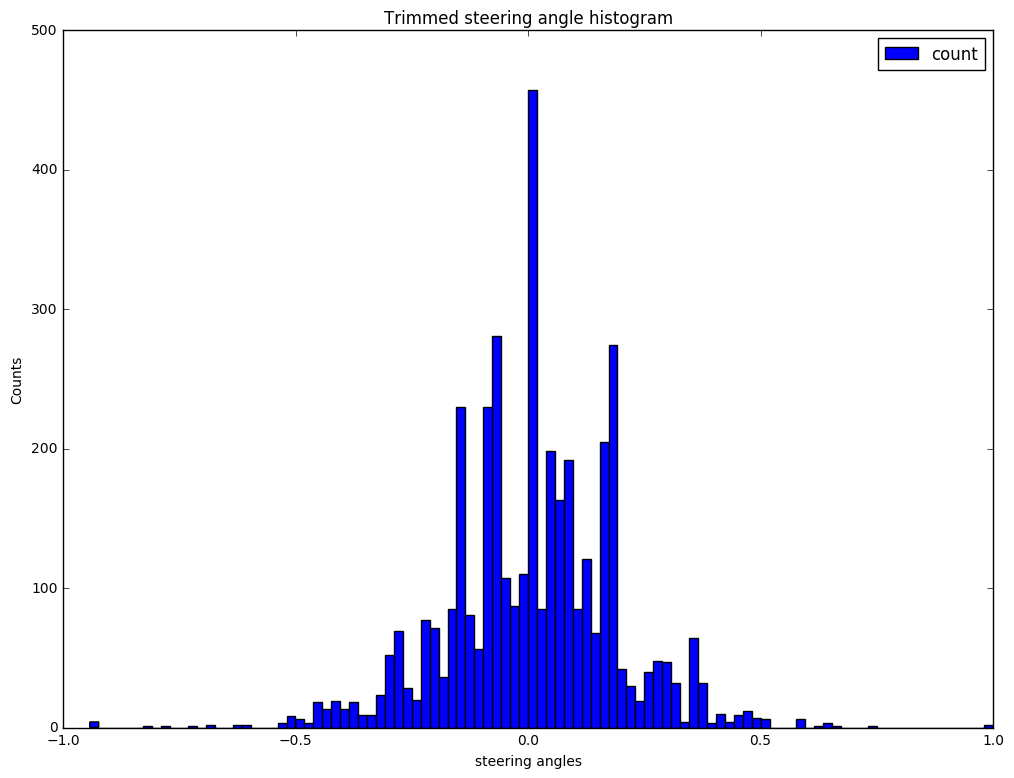

In [5]:
### inspection
import matplotlib.pyplot as plt
%matplotlib inline
def inspectHistogramOriginal():
    pltChangeSize()
    
    plt.hist(driving_log['steering'], bins=101, label='count')

    plt.title('Original steering angle histogram')  
    plt.xlabel('steering angles')  
    plt.ylabel('Counts')  
    plt.legend()  
    plt.show()
    
def inspectHistogram():
    pltChangeSize()
    
    plt.hist(df['steering'], bins=101, label='count')

    plt.title('Trimmed steering angle histogram')  
    plt.xlabel('steering angles')  
    plt.ylabel('Counts')  
    plt.legend()  
    plt.show()
    
def pltChangeSize():
    fig_size = plt.rcParams["figure.figsize"]
    # Set figure width to 12 and height to 9
    fig_size[0] = 12
    fig_size[1] = 9
    plt.rcParams["figure.figsize"] = fig_size

inspectHistogramOriginal()
inspectHistogram()